#Multilayer Perceptron Tutorial 

Let's begin with download and import packages!

In [ ]:
#download packages 
!pip install sklearn

# import library
import numpy as np
import random 
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot 

## Why Multilayer Perceptron?

Do you remember that we can only do classifications that can be linear separable in the single-layer perceptron? However, not all classification can be solved by simply drawing a line or plane. As a result, we introduce the multilayer perceptron, which can help us solve non-linear classification problems. 

# Classify What?

Before we begin, let's first take a look at the dataset we will use in our tutorial!

We use 100 samples in our tutorial:

In [2]:
# Set up parameters 
n_samples = 100
param_noise = 0.1
param_random = 1

# Create our datapoints
trainX, trainY = make_circles(n_samples=n_samples, 
                                noise=param_noise, 
                                random_state=param_random)

Now take a look at our dataset!

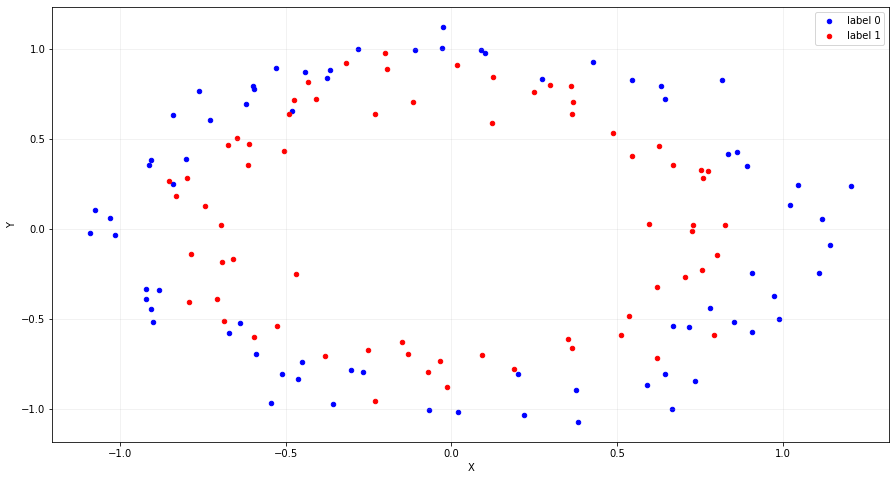

In [25]:
# First we group the data
df = pd.DataFrame(dict(X=trainX[:,0], Y=trainX[:,1], label=trainY))
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots(figsize=(15, 8))
grouped = df.groupby('label')

# For each group, we add it
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X', y='Y', s=20, label='label ' + str(key), color=colors[key])
plt.grid(alpha=0.2)
plt.show()

Then we split the dataset, we used 30% of the data point to train and 70% of them to test our multilayer perceptron.

In [4]:
# Percentage for test
test_perc = 0.3

trainX, testX, trainY, testY = train_test_split(trainX, trainY, 
                                                    test_size=test_perc, 
                                                    random_state=42)

print("Shape of trainX: ", trainX.shape)
print("Shape of trainY: ", trainY.shape)
print("")
print("Shape of testX: ", testX.shape)
print("Shape of testY: ", testY.shape)

Shape of trainX:  (70, 2)
Shape of trainY:  (70,)

Shape of testX:  (30, 2)
Shape of testY:  (30,)


Then we use matplotlib to see what our data looks like!

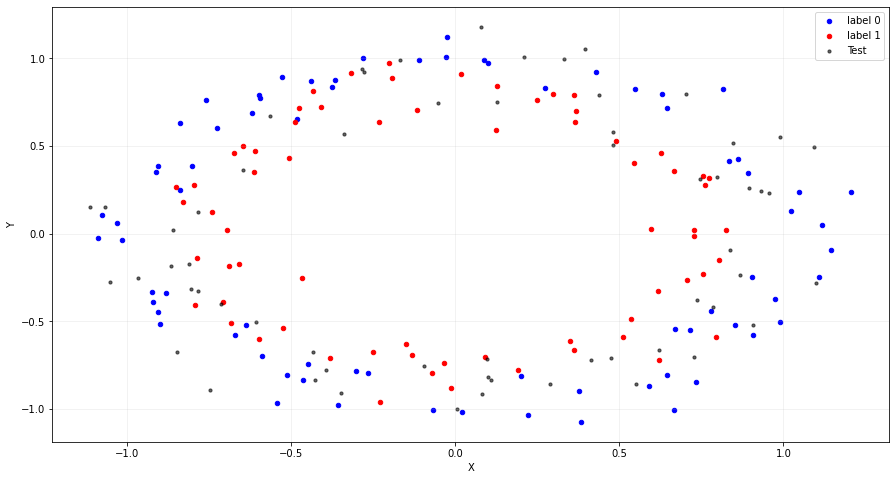

In [26]:
# We define a dataframe to group our data into 2 classes
df = pd.DataFrame(dict(X=trainX[:,0], Y=trainX[:,1], label=trainY))
# Define color for each label
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots(figsize=(15, 8))
grouped = df.groupby('label')

# For each group, we plot it
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X', y='Y', s=20, label='label ' + str(key), color=colors[key])

plt.scatter(testX[:,0], testX[:, 1], s=10, c='black', alpha=0.6, marker='o', label='Test')
plt.grid(alpha=0.2)
plt.legend()

plt.show()

In [6]:
# We need to reshape the dataset in order for our perceptron to work properly
trainX = np.reshape(trainX,(int(n_samples*(1-test_perc)),2))
trainY = np.reshape(trainY,(int(n_samples*(1-test_perc)),1))
testX = np.reshape(testX,(int(n_samples*test_perc),2))
testY = np.reshape(testY,(int(n_samples*test_perc),1))
np.shape(trainY)

(70, 1)

Now we are all set! Let's talk about multilayer perceptron!

## New Activation Function: Sigmoid

What do you remember from the single-layer perceptron tutorial? We passed a weighted sum into the threshold and saw what is our output: 0 or 1. However, the activation function that we used in the single-layer perceptron is not differentiable. As a result, it makes us difficult to train our perceptron.

Now we introduce the sigmoid, which is a function that looks similar to the activation function, but it can be differentiated everywhere. 
$$ f(x) = \frac{1}{1+e^{-x}}$$
Below is the python code of the sigmoid:



In [7]:
# The sigmoid function
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

## Backpropagation

What is Backpropagation? It sounds not familiar to us at all! However, it is a fancy name for gradient descent. 

Recall that we calculate the predicted value by using forward propagation. And now, we want to update the weights and biases using backpropagation. In backpropagation, what we are doing is Chain Rule. 

Below is a sample multilayer perceptron that we will use: 

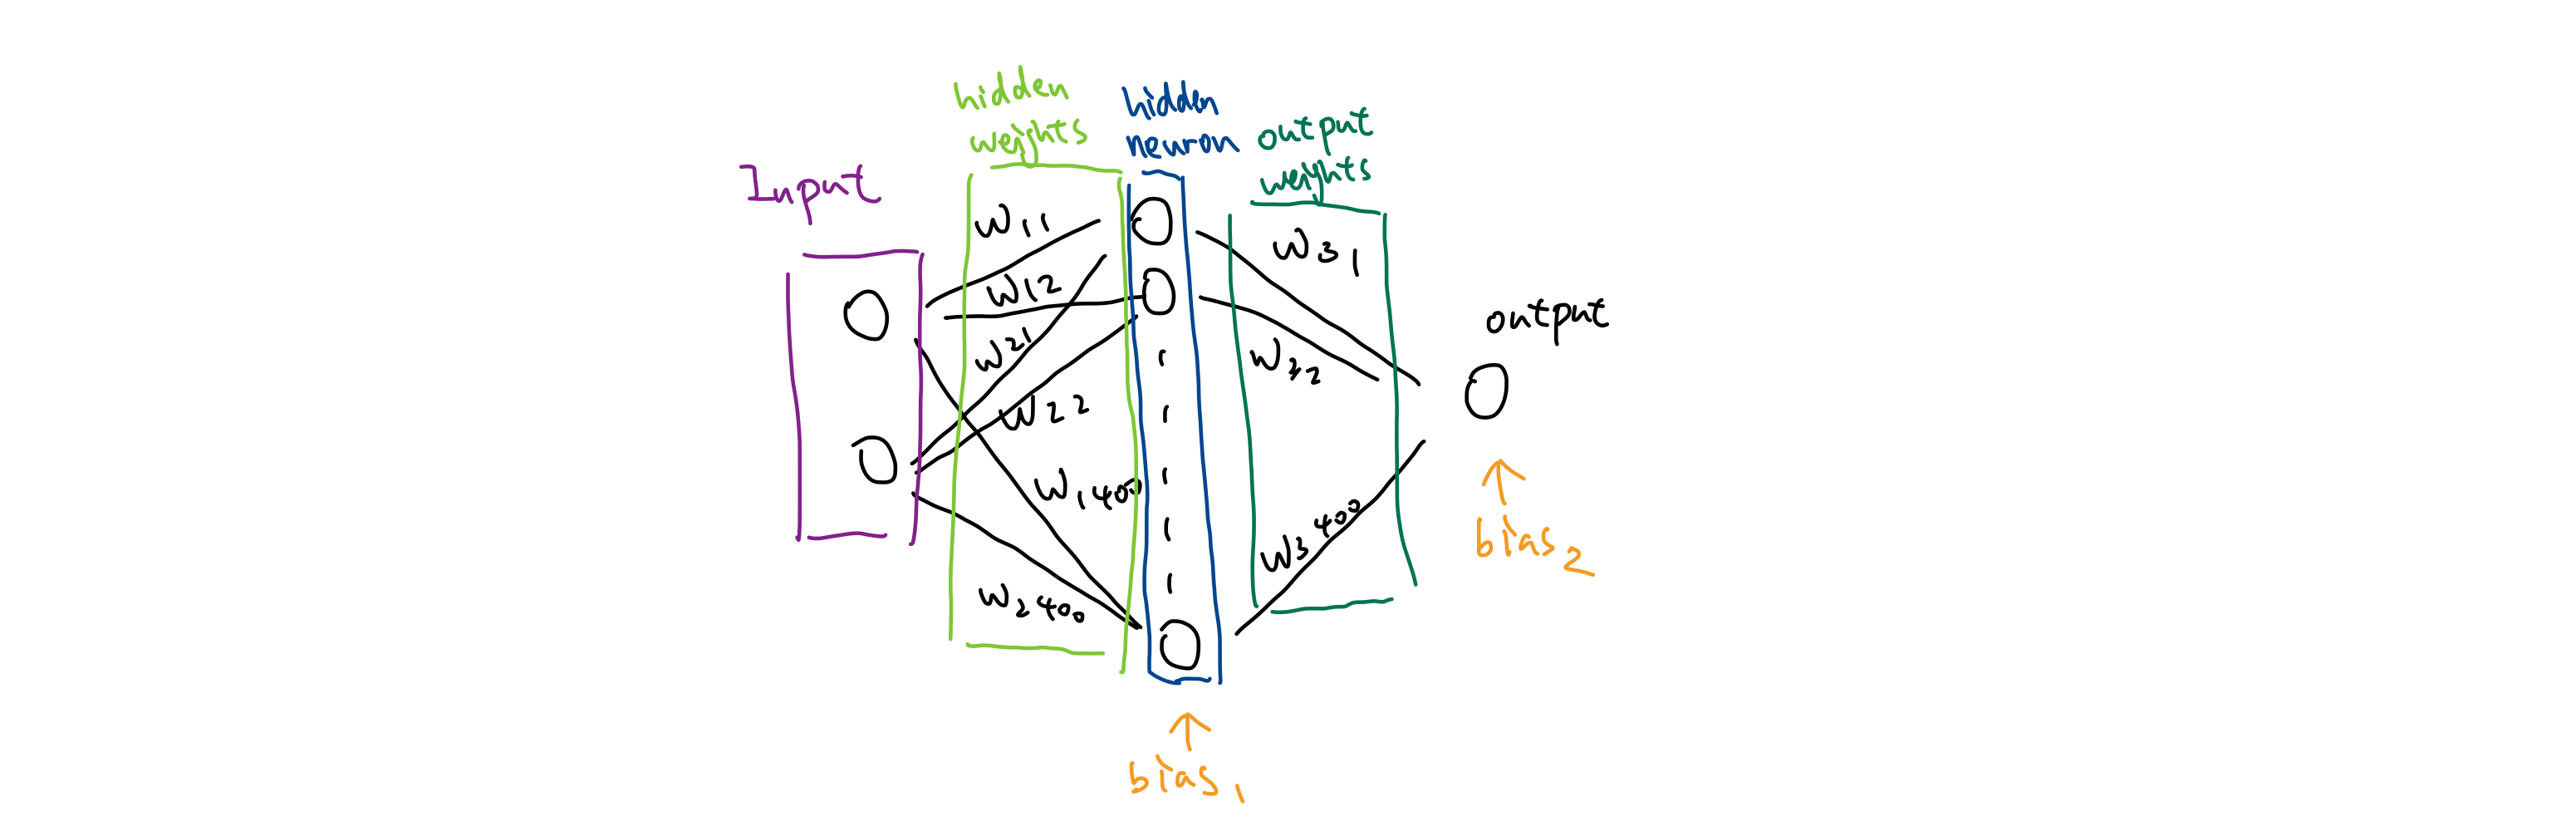

For every input unit, we have two inputs, and each neuron will receive the sum of two weighted inputs and the bias. Remind that we have four hundred neurons. Then we will calculate the sum of all four hundred weighted inputs and the bias to get the output. 

To be more specific, we can use the matrixes below to represent the weights and biases. 

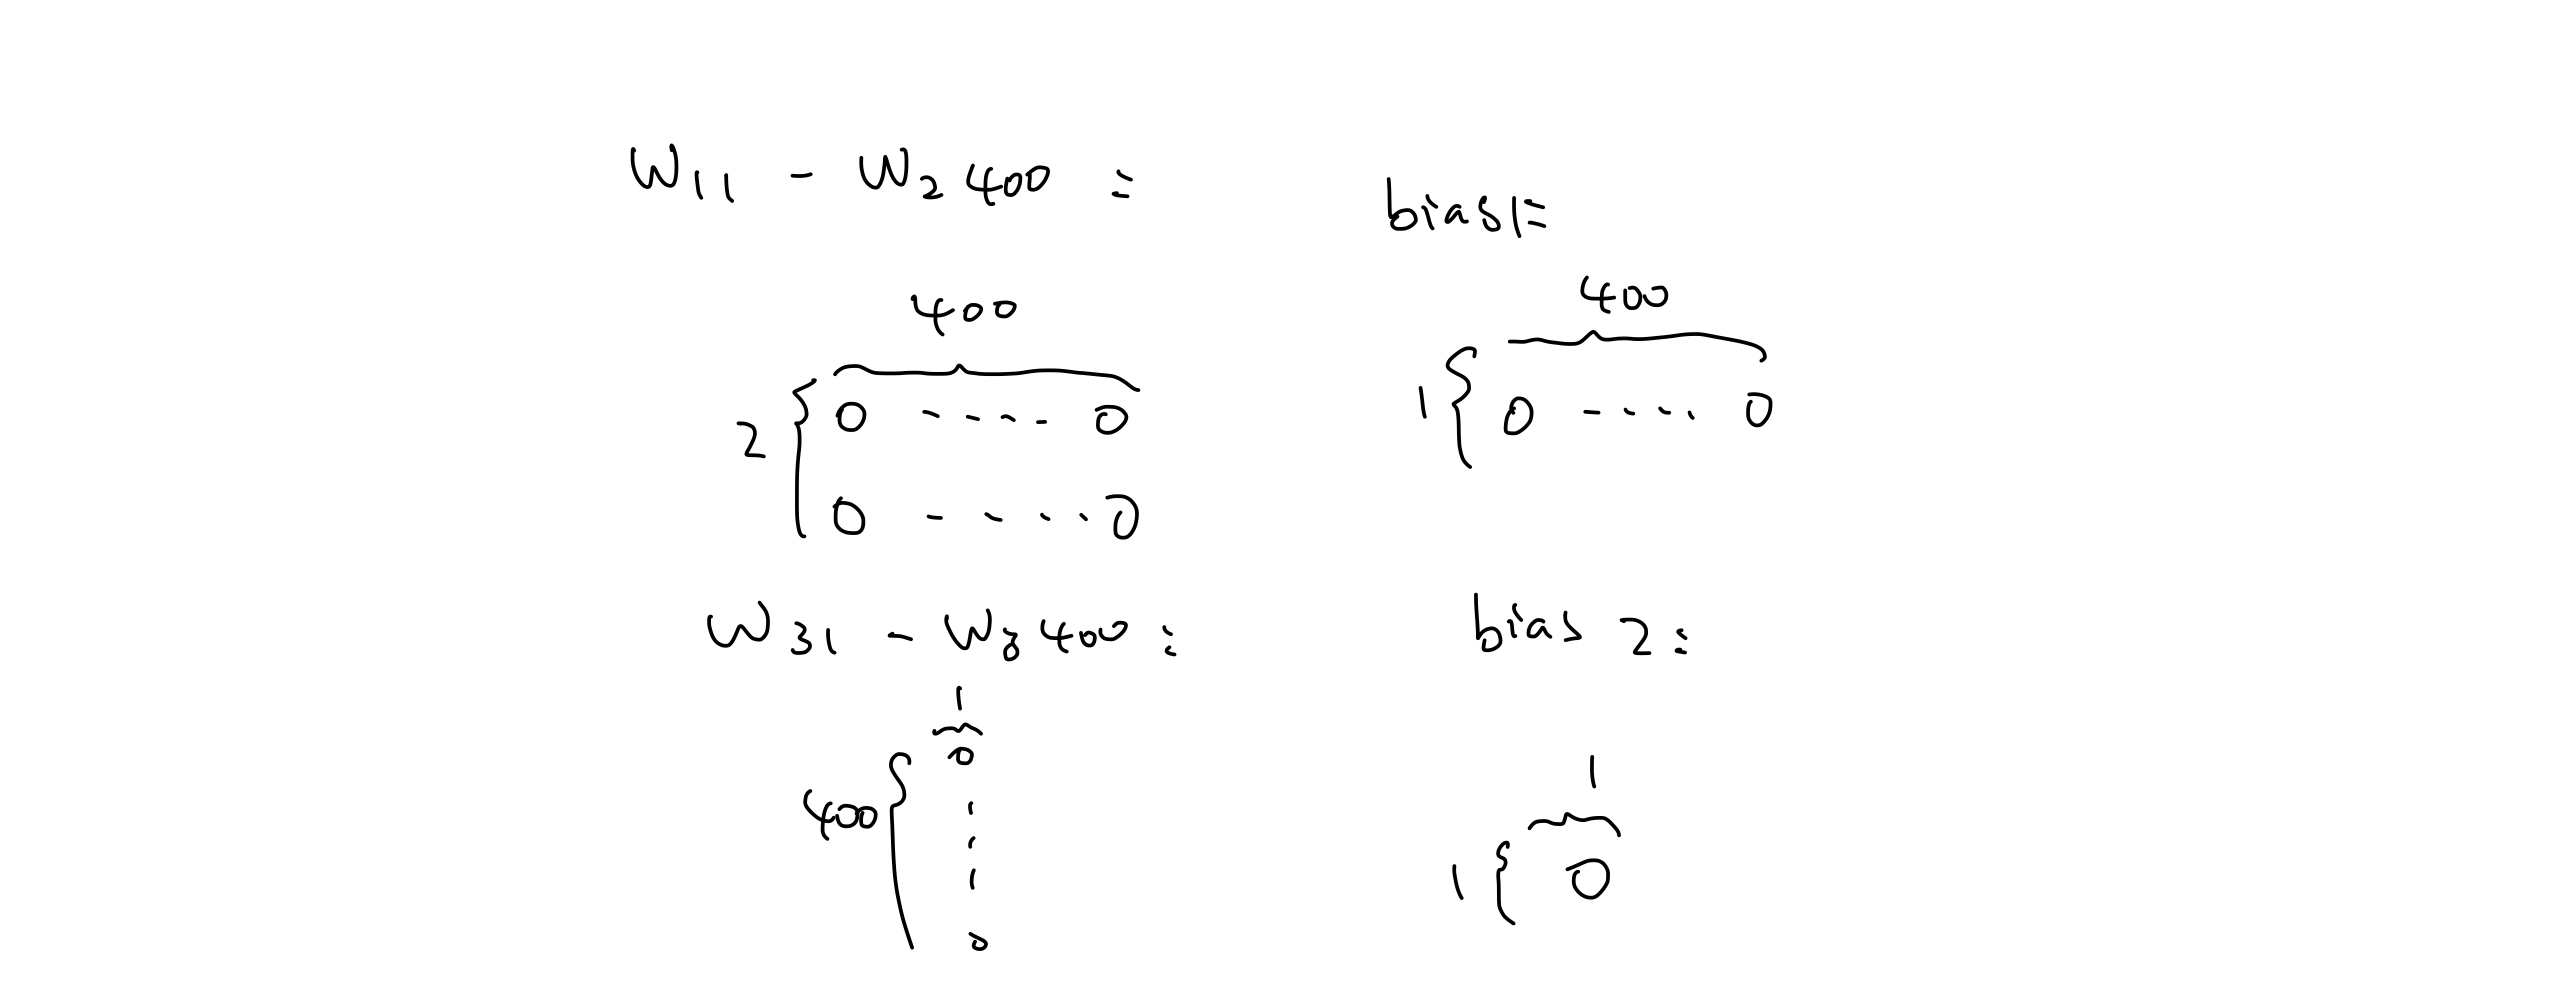

In [8]:
# Set up the dimension of our weight and bias matrix
numInputs = 2
numHidden = 400
numOutputs = 1

Now we can initialize our weights and biases!

In [9]:
#Set up our weights and bias by using random.randn 
# (Generate normal distributed random number)
hiddenWeights = np.random.randn(numInputs,numHidden)
hiddenBias = np.random.randn(1, numHidden)

outputWeights = np.random.randn(numHidden,numOutputs)
outputBias = np.random.randn(1,numOutputs)

And now we start to talk about math. As we talked about at the beginning of this section, you can imagine the backpropagation as a long chain rule. Here is the reason that why we want to use the chain rule. 

Here is a diagram that shows what we will do next. Please frequently check this graph!


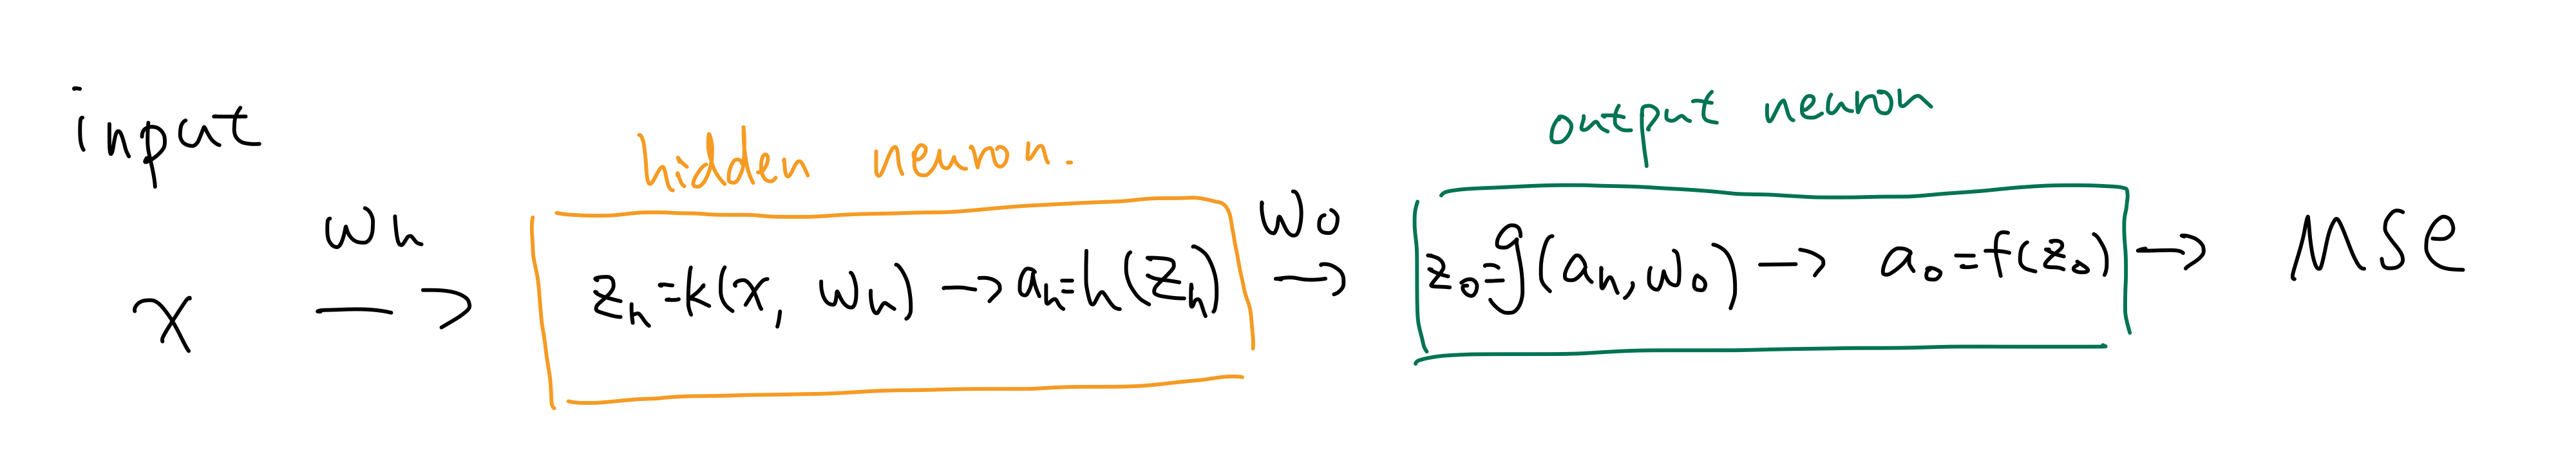

We use the mean squares error to calculate the accuarcy our of model. As a result, here is the function: 
$$z = (f(x,w_{output},w_{hidden})-y)^2$$
Where $f(x,w_{output},w_{hidden})$ is our multilayer perceptron and $f(x,w_{output},w_{hidden}) = f(z_O)= y_{predicted}$. 


$w_{output}$ is the weights of the output layer, and $w_{hidden}$ is the weight of the hidden layer. 


$$\frac{\partial{z}}{\partial{w_{Output}}} = \frac{\partial{z}}{\partial{f(z_O)}} \frac{\partial{f(z_O)}}{\partial{g(a_h,w_O)}} \frac{\partial{g(a_h,w_O)}}{\partial{w_{O}}}$$

Where $f(z_O)$ is the activation function, the sigmoid, and $g(a_h,w_O)$ is our linear combination function on the output layer, the sigmoid. 

These partial derivatives turn out to be:  
$\frac{\partial{z}}{\partial{f(z_O)}} = f(z_O)-y$

$\frac{\partial{f(z_O)}}{\partial{g(a_h,w_O)}} = f(z_O) \times (1 - f(z_O))$

*Note that $f(z_O) \times (1 - f(z_O)$ is the derivative of the sigmoid

$\frac{\partial{g(a_h,w_O)}}{\partial{w_{O}}}$ = hiddenOutput

As a result, we can write that:
$$\frac{\partial{z}}{\partial{w_{}}} = hiddenOutput\times Sigmoidprime \times (f(z_O)-y)$$

Then we can do same thing to the hidden layer, but it will become a realy long equation:
$$\frac{\partial{z}}{\partial{w_{h}}} = \frac{\partial{z}}{\partial{f(z_O)}} \frac{\partial{f(z_O)}}{\partial{g(a_h,w_O)}} \frac{\partial{g(a_h,w_O)}}{\partial{h(z_h)}}\frac{{\partial{h(z_h)}}}{\partial{k(x,w_h)}} \frac{\partial{k(x,w_{h})}}{\partial{w_{h}}}$$

Where $h(Y,w_{hidden})$ is the activation function, and $k(x,w_{h})$ is the linear combination function.

I know that his looks confusing, and here is a diagram that explains what we are doing and are these derivatives. 

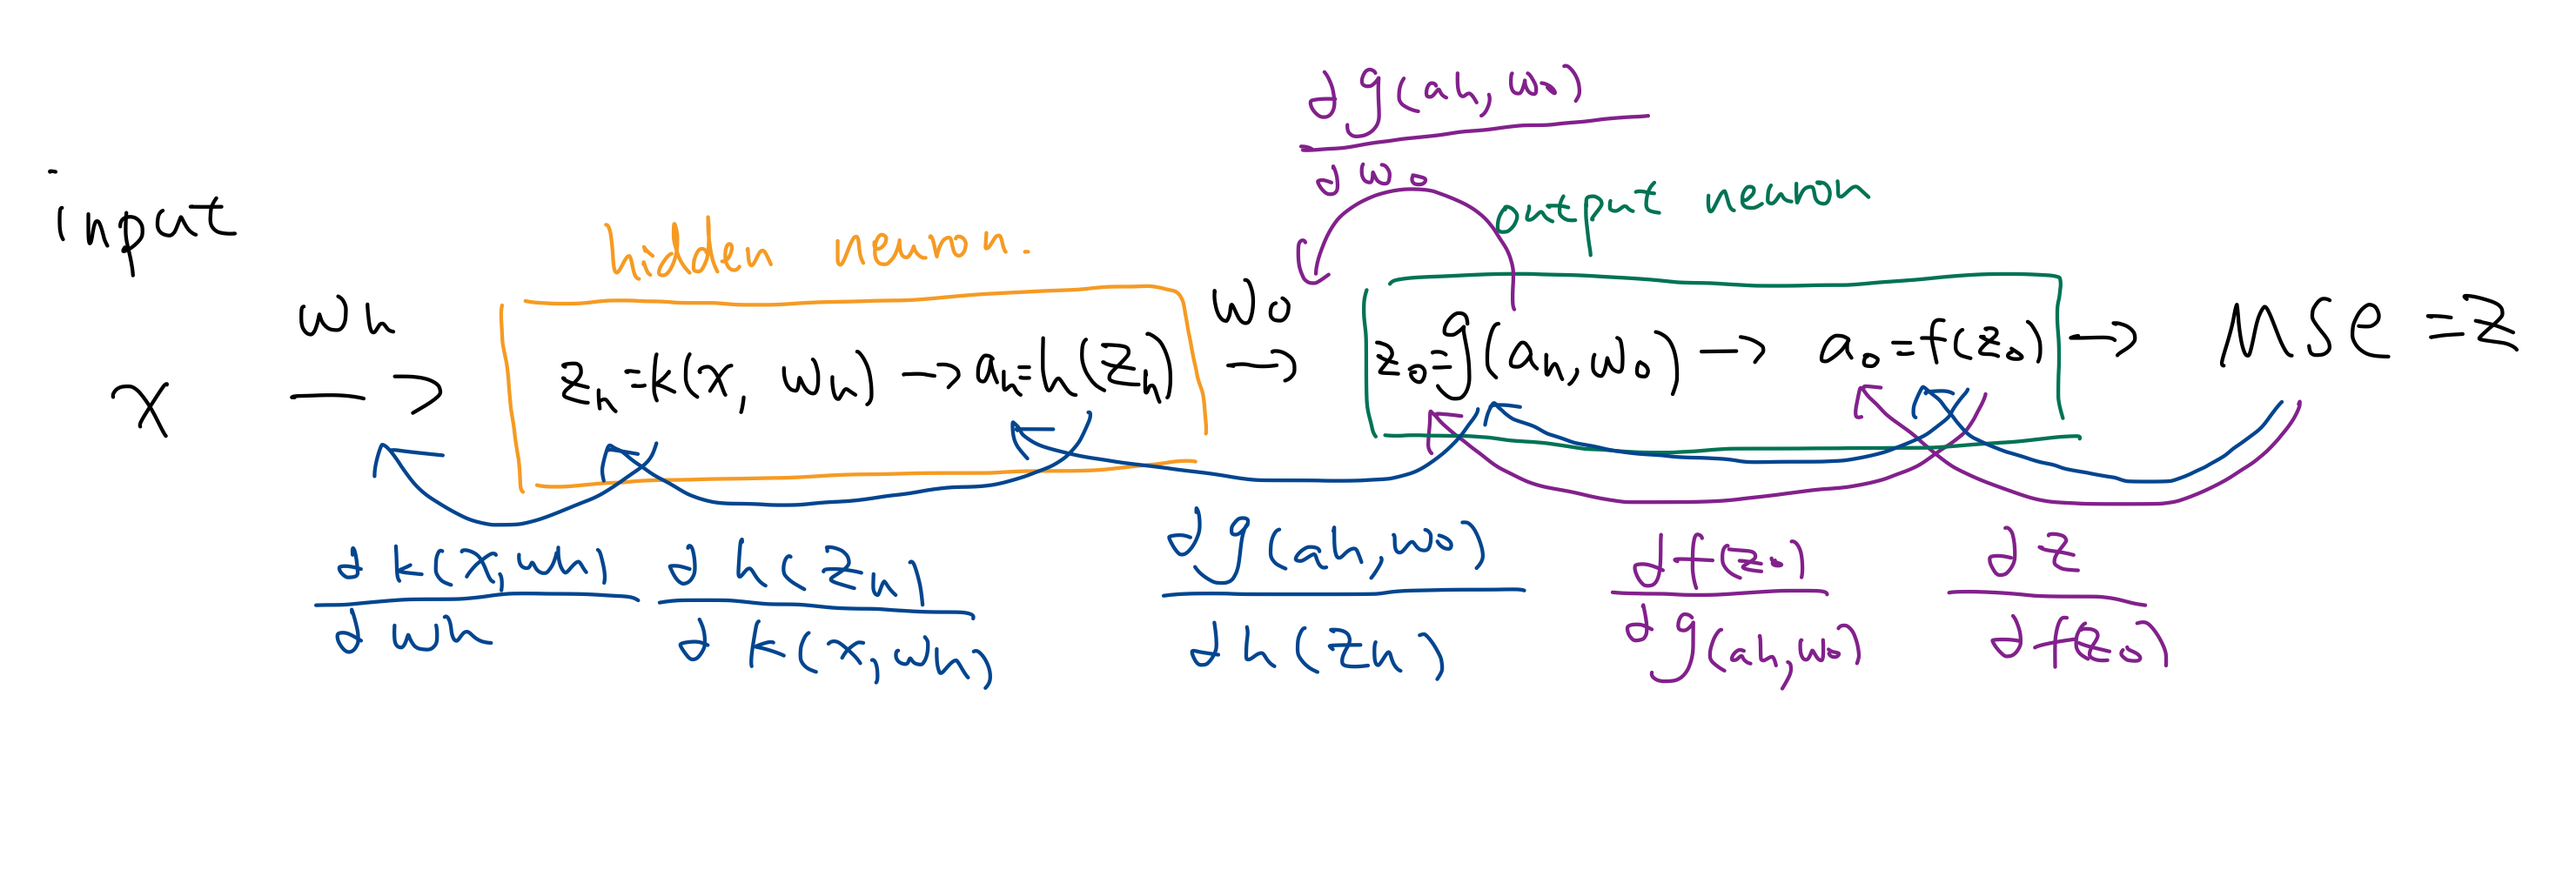

Here is a link that explains these things really well: https://www.jeremyjordan.me/neural-networks-training/

## Code!

First we write the code which define the sigmoidPrime:

In [10]:
# derivative of the sigmoid! 
def sigmoidPrime(a):
  return sigmoid(a) * (1-sigmoid(a))

Then we write the code that calculate the derivative at the outpur layer:

In [11]:
# define \partial z / \parital w_output
def backpro_output(expectedOutput,aO):
  #start with the error
  error = (expectedOutput - aO)
  #then times the sigmoidPrime to get the derivative at output layer
  dOutput = error * sigmoidPrime(aO)
  return dOutput, error

Then we can do the same thing to the hidden layer, here we still use the sigmoid as the activation function.

In [12]:
def back_pro_hidden(dOutput, outputWeights,hiddenOutput):
  # Calculate the error at hidden layer 
  errorHidden = np.dot(dOutput, outputWeights.T)
  #then times the sigmoidPrime to get the derivative at output layer
  dHidden = errorHidden * sigmoidPrime(hiddenOutput) 
  return dHidden

Now let's try to combine all the stuff together! 

Remember that we need first do the forward path to calculate the expected output and all the nessisary numbers. 

In [18]:
# initialize everything here! 
# We use the trainX as input and trainY as expected output
inputs = trainX
expectedOutput = trainY
# define number of epochs and learning rate
nEpoch = 1000
eta = 0.001
# define the network architecture
numInputs = 2
numHidden = 400
numOutput = 1
# initialize weights and biases with random weights and biases
hiddenWeights = np.random.randn(numInputs, numHidden)
hiddenBias = np.random.randn(1, numHidden)
outputWeights = np.random.randn(numHidden,numOutput)
outputBias = np.random.randn(1,numOutput)

# loop through training nEpoch times
MSE = np.zeros(nEpoch)

Here we begin our loop! 

Text(0, 0.5, 'MSE')

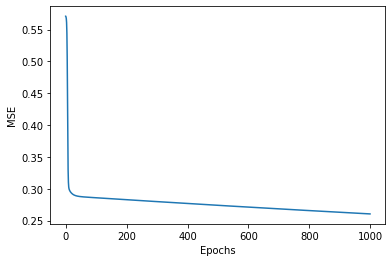

In [19]:
# Begin our loop! 
for i in range(nEpoch):
  # The activation energy of hidden layer
  zH = np.dot(inputs,hiddenWeights) + hiddenBias 
  # The output on the hidden layer 
  aH = sigmoid(zH)
  # The activation energy of output layer
  zO = np.dot(aH,outputWeights) + outputBias
  # Compute output of output layer
  aO = sigmoid(zO)
  # Compute dOutput that we will use to update output weights
  dOutput, error = backpro_output(expectedOutput,aO)
  # Compute the dHidden that we will use to update hidden weights
  dHidden = back_pro_hidden(dOutput, outputWeights,aH)

  # Update weights and biases
  outputWeights += np.dot(aH.T, dOutput) * eta
  outputBias += np.sum(dOutput, axis=0, keepdims=True) * eta
  hiddenWeights += np.dot(inputs.T, dHidden) * eta
  hiddenBias += np.sum(dHidden, axis=0, keepdims=True) * eta  
  # Store total error for plotting
  MSE[i] = np.mean(error**2)
    

plt.figure()
plt.plot(MSE)
plt.xlabel('Epochs')
plt.ylabel('MSE')

A more convient way to do multilayer perceptron! And here we introduce the keras! 

In [20]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from matplotlib import pyplot 
# Create model
model_basic = Sequential()
# We begin to add the number of nodes here 
model_basic.add(Dense(400, input_dim = trainX.shape[1], activation='relu'))
# we use sigmoid as our activation function 
model_basic.add(Dense(1, activation='sigmoid'))
# And here we use the mean squared error, same as what we did before. 
model_basic.compile(loss='mean_squared_error', optimizer='adam', 
                    metrics=['accuracy'])
model_basic.summary()
# Train model
hist_basic = model_basic.fit(trainX, trainY, 
                             validation_data=(testX, testY),
                             epochs=5000, 
                             verbose=0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 401       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


Train: 0.9428571462631226 Test:  0.699999988079071


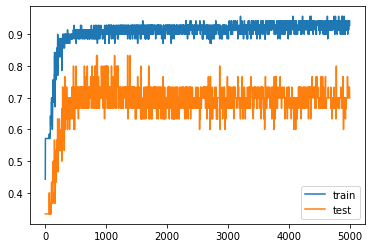

In [21]:
from matplotlib import pyplot 
_, train_acc = model_basic.evaluate(trainX,trainY, verbose=0)
_, test_acc = model_basic.evaluate(testX,testY, verbose=0)
print("Train:", train_acc, "Test: ", test_acc)
pyplot.plot(hist_basic.history['accuracy'], label='train')
pyplot.plot(hist_basic.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

#How to improve our model?

The best thing to do is use a bigger dataset. Let's see how it goes! Now we are 200 data points.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 401       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Train: 0.9071428775787354 Test:  0.8500000238418579


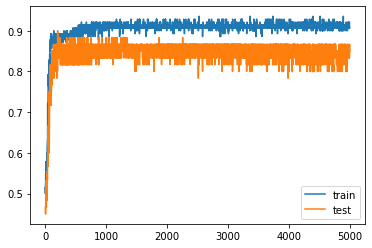

In [24]:
# Set up parameters 
n_samples = 200
param_noise = 0.1
param_random = 1
test_perc = 0.3

# Create Data
trainX, trainY = make_circles(n_samples=n_samples, 
                                noise=param_noise, 
                                random_state=param_random)
# Split the test dataset and the train dataset 

trainX, testX, trainY, testY = train_test_split(trainX, trainY, 
                                                    test_size=test_perc, 
                                                    random_state=42)


# Create model
model_basic = Sequential()
# We begin to add the number of nodes here 
model_basic.add(Dense(400, input_dim = trainX.shape[1], activation='relu'))
# we use sigmoid as our activation function 
model_basic.add(Dense(1, activation='sigmoid'))
# And here we use the mean squared error, same as what we did before. 
model_basic.compile(loss='mean_squared_error', optimizer='adam', 
                    metrics=['accuracy'])
model_basic.summary()
# Train model
hist_basic = model_basic.fit(trainX, trainY, 
                             validation_data=(testX, testY),
                             epochs=5000, 
                             verbose=0)

_, train_acc = model_basic.evaluate(trainX,trainY, verbose=0)
_, test_acc = model_basic.evaluate(testX,testY, verbose=0)
print("Train:", train_acc, "Test: ", test_acc)
pyplot.plot(hist_basic.history['accuracy'], label='train')
pyplot.plot(hist_basic.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

However, it may not be the case. Sometimes we may only have certain data points. For example, in the housing price prediction, the number of data points may increase at a very slow speed since the number of deals increase very slowly. So, let's imagine that we only have these 100 data points; how can we make up some reasonable data points? Here we introduce Gaussian noise! What Gaussian noise does is to copy our dataset, and add a normally distributed noise to it, and use the combined dataset (the original one and added noise one) as our training data. 


In [22]:
# Create model
from keras.layers import GaussianNoise
model_n = Sequential()
model_n.add(GaussianNoise(0.1, input_shape = (2,)))
model_n.add(Dense(400, input_dim = trainX.shape[1], activation='relu'))
model_n.add(Dense(1, activation='sigmoid'))
model_n.compile(loss='mean_squared_error', optimizer='adam', 
                metrics=['accuracy'])
model_n.summary()
# Train model
hist_n = model_n.fit(trainX, trainY, 
                             validation_data=(testX, testY),
                             epochs=5000, 
                             verbose=0)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise (GaussianNois (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


Train: 0.8857142925262451 Test:  0.6666666865348816


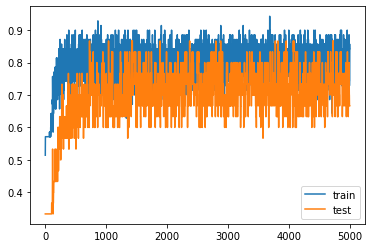

In [23]:
_, train_acc = model_n.evaluate(trainX,trainY, verbose=0)
_, test_acc = model_n.evaluate(testX,testY, verbose=0)
print("Train:", train_acc, "Test: ", test_acc)
pyplot.plot(hist_n.history['accuracy'], label='train')
pyplot.plot(hist_n.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

You can see that we made a better prediction here! 

Besides, here is a web page can help you know more about noise: https://towardsdatascience.com/noise-its-not-always-annoying-1bd5f0f240f

# Discussion 

You can see that the multilayer perceptron is already very powerful; however it's really time consuming and you need to use power GPU to train the perceptrons. And human never satisfy with their situations, so there are something to expect!